# 딥러닝 강의 - softmax classification과 cnn 

In [1]:
import tensorflow as tf
import random


from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
###원래 있던 code 설명 중에 남긴 건 ###로, 새로 쓴건 #로 정리했습니다. 

C:\anaconda\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
###tensorflow에서 기본적으로 제공하는 mnist데이터를 받아옵니다. 
###이 데이터는 사진(28*28*1)으로, 흰색 배경에 검은색으로 0~9까지 숫자가 필기체로 적혀있습니다. 
###이때 이 사진에 어떤 수가 적혀있는 것인지 맞추게 하는 것이 이번 딥러닝 예제의 목표입니다..!
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


# softmax classification-basic NN

### 텐서플로우 노드를 만들어봅시다.

In [3]:

#이때 placeholder는 새로 variable을 만드는것, 개별 데이터 없이도 그래프를 그리고 모델링 해줄 수 있게 하는 데이터 통 느낌
#tf.float32: Dtype-tf.float32 or tf.int32 이 자료형으로 string_tensor의 자료형이 변환됨
x=tf.placeholder(tf.float32,[None,784],name='x')
y=tf.placeholder(tf.float32,[None,10],name='y')
    
###여기서 784라는 숫자는 사진이 28*28*1이기 때문에 한 사진당 총 픽셀이 28의 제곱인 784개 들어있기 떄문에 사용합니다. 
###즉 softmax classification 방법은 데이터를 일렬로 쭉 펴서 저장해두는 방식을 사용합니다.
#여기서 10은 분류할 데이터의 개수(0~9 중 어떤 것인지 맞추는 문제니까 10)


### 가설함수 H(x)=Wx+b를 만들어 봅시다. 

In [4]:
 
#tf.name_scope: 내부에 만든 op의 이름(layer 1)에 scope를 만드는 것. n*28의 형태라고 알아먹을 수 있게 지정
with tf.name_scope("layer1"):
    #우리가 글로 적을 때는 Wx+b라 적지만 실제 코딩을 할떄는 xW+b와 같은 형태입니다.
    #x가 n*784, W가 784*28 b가 n*28이고 따라서 layer1은 n*28이 될 것입니다. 
    #tf.Variable은 variable을 만들겠다는 의미
    W1=tf.Variable(tf.random_normal([784,28]),name='weight1')
    b1=tf.Variable(tf.random_normal([28]),name='bias1')
    layer1=tf.sigmoid(tf.matmul(x,W1)+b1)
    #tf.sigmoid: sigmoid값을 계산(neural network의 binary classification 마지막 레이어의 활성함수로 활용한다.)
    #tf.mamul(a,b): Multiplies matrix a by matrix b, producing a * b.
    
    ###summary.histogram은 tensorboard에서 표를 그릴때 사용하는 것으로 
    ###나중에 tensorboard를 배우고 싶으신 분들이 있을까봐 참고용으로 지우지 않고 넣어두었습니다. 
    ###w1_hist=tf.summary.histogram("weighth1",W1)
    ###b1_hist=tf.summary.histogram("biash1",b1)
    ###layer1_hist=tf.summary.histogram("layer1",layer1)

with tf.name_scope("layer2"):
    W2=tf.Variable(tf.random_normal([28,10]),name='weight2')
    b2=tf.Variable(tf.random_normal([10]),name='bias2')
    #tf.random_normal: tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
    #정규분포로부터의 난수값을 반환합니다.
    
    ###logits는 Wx+b로 우리가 W,b를 조절하며 계산,예측한 값을 의미합니다. 
    logits=tf.matmul(layer1,W2)+b2
    hypo=tf.nn.softmax(logits)
    #softmax = tf.exp(logits)
   
    ###w2_hist=tf.summary.histogram("weighth2",W2)
    ###b2_hist=tf.summary.histogram("biash2",b2)
    ###logits_hist=tf.summary.histogram("logits",logits)
    

### cost함수를 만들어 봅시다

In [5]:

with tf.name_scope("cost"):
    cost=tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y)
    ###cost_sum=tf.summary.scalar("cost",cost)
    #what tf.nn.softmax_cross_entropy_with_logits_v2 do?
    #1)Apply softmax to the logits (y_hat) in order to normalize them: y_hat_softmax = softmax(y_hat).
    #2)Compute the cross-entropy loss: y_cross = y_true * tf.log(y_hat_softmax)
    #3)Sum over different class for an instance: -tf.reduce_sum(y_cross, reduction_indices=[1])

### cost를 줄이는 optimizer로 우리가 잘 아는 경사하강법(gradient descent)을 사용합니다.

In [6]:
 
with tf.name_scope("train"):
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
    # Smaller learning rates require more training epochs given the smaller changes made to the weights each update, 
    # whereas larger learning rates result in rapid changes and require fewer training epochs.

### 우리가 만든 가설함수의 정확성을 확인하기 위한 코드입니다.

In [7]:

prediction=tf.argmax(hypo,axis=1)
#tf.argmax(a, 1)는 2차원 배열의 각 행에서 가장 큰 값을 찾아  인덱스를 반환합니다.. 

is_correct=tf.equal(prediction,tf.argmax(y,1))
#tf.equal: Returns the truth value of (x == y) element-wise.
###여기서 주의할 점은 뒤에 실행 코드를 보시면 아시겠지만 이 x,y에는 train이 아닌 test데이터를 집어넣습니다.  
accuracy=tf.reduce_mean(tf.cast(is_correct,tf.float32))
#tf.reduce_mean: Computes the mean of elements across dimensions of a tensor.
#tf.cast: tensor를 새로운 형태로 casting(ex. True면 1 이런식으로 자료형 change)
###accuracy_sum=tf.summary.scalar("accuracy",accuracy)

### 지금까지는 가설함수와 층을 만들고, 코스트를 줄이는 방식(여기서는 경사하강법)을 정하는 등 텐서플로우 상에서 'graph를 그린 것'입니다. 
### 이제부터 할 것은 실제로 그 안에서 가설함수의 코스트를 줄이는 방향으로 학습을 진행하라는 코드를 볼 것입니다.  

Accuracy 0.8598
Label:  [8]
Prediction:  [3]


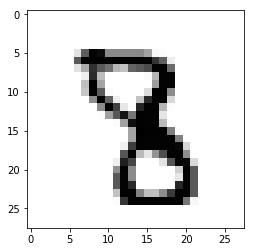

Accuracy 0.8895
Label:  [4]
Prediction:  [4]


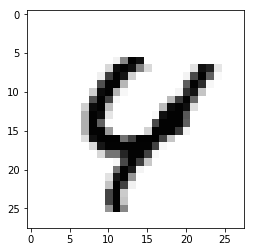

Accuracy 0.9026
Label:  [6]
Prediction:  [6]


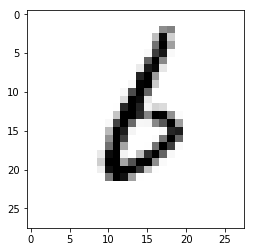

Accuracy 0.9111
Label:  [0]
Prediction:  [0]


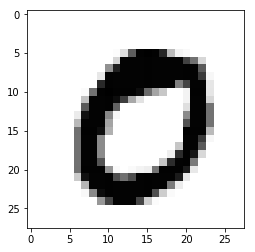

Accuracy 0.9129
Label:  [9]
Prediction:  [9]


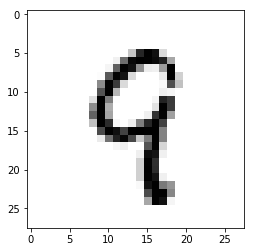

Accuracy 0.9214
Label:  [0]
Prediction:  [0]


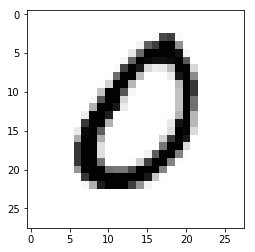

Accuracy 0.9251
Label:  [8]
Prediction:  [8]


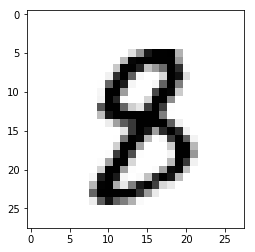

Accuracy 0.9252
Label:  [4]
Prediction:  [4]


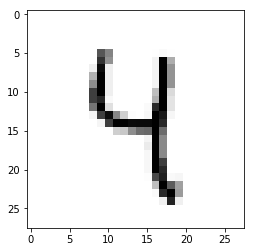

Accuracy 0.9287
Label:  [8]
Prediction:  [8]


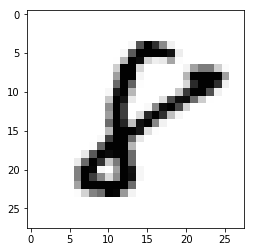

Accuracy 0.9291
Label:  [7]
Prediction:  [7]


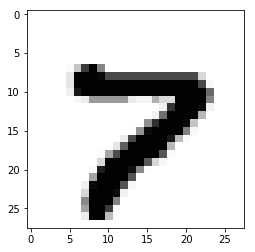

Accuracy 0.9316
Label:  [1]
Prediction:  [1]


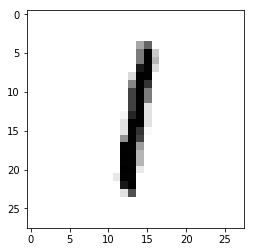

Accuracy 0.9348
Label:  [0]
Prediction:  [0]


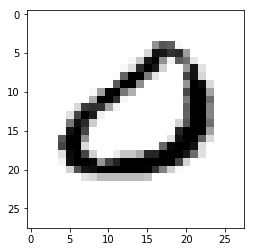

Accuracy 0.9364
Label:  [2]
Prediction:  [7]


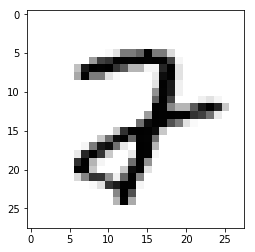

Accuracy 0.9353
Label:  [0]
Prediction:  [0]


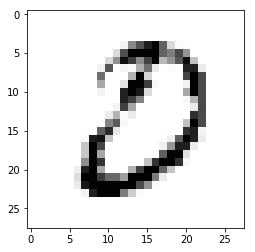

Accuracy 0.94
Label:  [0]
Prediction:  [0]


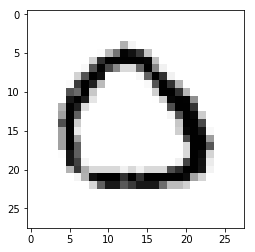

In [8]:
 
with tf.Session() as sess:
    ###이는 sess=tf.Session()과 같은 의미로 계산 과정을 시작하자는 시동을 거는 것입니다. 
    
    ###parameters로 iter_epoch는 전체 학습 반복 횟수, batch_size는 한번에 읽어드려서 학습시키는 양을 의미합니다. 
    ###batch_size는 왜 필요할까요?
    # It requires less memory. Since you train the network using fewer samples, 
    #the overall training procedure requires less memory.
    #batch_size는 전체 data sample보다 항상 작은 값
    iter_epoch=15
    batch_size=100
    
    
    ###global_step=0
    ###merged=tf.summary.merge([accuracy_sum,cost_sum])
    ###writer=tf.summary.FileWriter('c:\\GH\\tensor')
    ###writer.add_graph(sess.graph)
    ###valid_x=mnist.validation.images
    ###valid_y=mnist.validation.labels
    
    
    ###전역 변수 initializer을 사용하여 우리가 만든 W등의 초기화를 미리 지정한 방식(이 경우 random_normal)으로 초기화해줍니다.
    #변수 초기화를 위한 작업(op)을 추가하기 위해 tf.global_variables_initializer()를 사용해봅시다. 
    #모델을 모두 만들고 세션에 올린 후 이 작업을 실행할 수 있습니다.
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(iter_epoch):
        avg_cost=0
        total_batch=int(mnist.train.num_examples/batch_size)
        ###total_batch는 전체 train 데이터 개수를 미리 설정한 batch_size(이 경우 100)으로 나눈 값으로 
        ###전체 train을 1번 완료 하려면 batch를 100개씩 넣는 작업을 몇번 반복해야하는 것인지를 뜻합니다 
        #1번의 epoch이 돌아가는 동안 안에 for-loop에서 batch_size에 맞춰 데이터를 몇번 뽑으면 되는지의 수 만큼 loop를 돌리는 것
        #우선 avg_cost=0으로 세팅하고 후에 각 cost를 반복횟수로 나눈 평균값으로 다시 맞춤
        
        for i in range(total_batch):
            
            batch_x,batch_y=mnist.train.next_batch(batch_size)
            ###train.next_batch는 다음 batch만큼의 데이터를 가져와서 batch_x,batch_y에 넣습니다.
            #batch_size에 맞춰서 data를 가져오게 된다. 
            ###이때 물론 batch_y는 각각의 사진의 실제 답,label입니다. 
            
            
            c,s,_=sess.run([cost,accuracy,optimizer],feed_dict={x:batch_x,y:batch_y})
            ###cost, accuracy_sum에 batch만큼의 데이터를 집어넣어 줍니다. 이때 동시에 optimzer에도 넣어 cost를 줄여주는 학습을 진행합니다.
            ###optimzer가 나타내는 값 자체는 중요하지 않기 때문에 _ 변수에 저장해주고 이런 _변수는 보통 활용하지 않을 변수에 사용합니다. 
            #feed_dict는 placeholder(여기서는 x,y)를 써먹을 때 필요함
            
            avg_cost+=c/total_batch
            ###평균 비용은 각 cost를 반복횟수인 train_batch로 나누어서 구합니다.
            
            
            ###s=sess.run(merged,feed_dict={x:valid_x,y:valid_y})  
            ###writer.add_summary(s,global_step)  
            ###global_step+=1
      
       ### print('Epoch:','%d' %(epoch+1), 'cost=','{0}'.format(avg_cost))
        print("Accuracy",accuracy.eval(session=sess,feed_dict={x:mnist.test.images,y:mnist.test.labels}))
        
        r = random.randint(0, mnist.test.num_examples - 1)
        #random.radint: Return random integers from low (inclusive) to high (exclusive).
        print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
        print("Prediction: ", sess.run(
            tf.argmax(logits, 1), feed_dict={x: mnist.test.images[r:r + 1]}))
        #argmax 함수는 가장 큰 값을 찾아서 1로 변환하는 one-hot encoding 알고리듬을 구현한다.
        #여기서 1은 차원: 가장 큰 확률을 갖는 값만 1로 바뀌고, 나머지는 0으로 바뀐다. 


        plt.imshow(mnist.test.images[r:r + 1].
                   reshape(28, 28), cmap='Greys', interpolation='nearest')
        #.imshow:image with scalar data
        #전체 test 갯수 중에서 하나를 난수로 선택해서 test set으로부터 image와 label을 1개만 가져온다. 
        #[r:r+1]은 슬라이싱(slicing)에 해당하는 문법으로 r에서부터 r+1 이전까지의 범위를 나타낸다. 
        #즉, r번째의 image와 label 하나를 가리킨다.
        #그걸 하나씩 가져와서 28*28로 reshape하겠다는 의미

        plt.show()

# CNN

In [9]:
tf.set_random_seed(777)  ### reproducibility를 위해 지정해둡니다. 

#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#tf.set_random_seed: 그래프 수준의 난수 시드를 설정합니다.
#모든 연산에 의해 생성된 난수 시퀀스들이 세션간 반복이 가능하게 하기위해서 그래프 수준으로 설정
#연산 수준은 하나의 연산 당 하나의 세션을 만든다.(1:1 관계 느낌)

### parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100


In [10]:
#드롭하지 않고 keep할 노드의 비율을 0~1 사이의 float 값으로 받는 것
### dropout (keep_prob) rate  0.7~0.5 가 train시 권장되고 test 시에는 1을 사용해야합니다. 이 부분은 뒤에서 ppt와 함께 다시 설명해드리겠습니다. 
keep_prob = tf.placeholder(tf.float32)

### CNN 기본 노드들을 만들어봅시다

In [11]:
#softmax 코드 부분과 다른점이 뭘까요..!?
#소프트맥스는 해당 항목이 배, 오렌지, 사과 또는 다른 과일일 확률을 확인할 수 있습니다. 
#모든 종류의 항목(여러 종류의 과일 접시)이 포함된 이미지 예의 경우 대신 로지스틱 회귀를 여러 개 사용해야 합니다.
#softmax는 outlayer와 동일한 수의 node를 갖는다. 

#Here we assign it a shape of [None, 784], where 784 is the dimensionality of a single flattened 28 by 28 pixel MNIST image, 
#and None indicates that the first dimension, corresponding to the batch size, can be of any size.
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (흑백 사진이기에, 컬러였으면 RGB로 28*28*3 이었을 것입니다)
#-1: If one component of shape is the special value -1, the size of that remains constant
Y = tf.placeholder(tf.float32, [None, 10])

### cnn 필터들과 다층 layer를 만들어봅시다

In [12]:
# L1 ImgIn shape=(?, 28, 28, 1)
#필터의 개별 크기는 [3,3,1(이는 흑백이어서,컬러면 3)]인 것이고 필터의 총 개수가 32개인것입니다. 
#필터는 이미지의 일부만 한번에 처리한다는 느낌
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
#동일한 크기의 필터를 거친 이미지가 생긴다. (32개의 채널을 갖는다)


#x를 받아서 한점을 출력해낸다(LeLU(Wx+b))->똑같은 필터를 갖고 다른 부분도 본다. 
#이걸 반복할 수 있게 하는게 relu, conv
#Padding 옵션을 SAME으로 주었다. 
#필터사이즈를 무엇으로하던지 상관없이 출력되는 이미지의 크기가 원래 이미지사이즈와 같게 해주겠다는 의미이다.
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob) 
#pooling: 한 layer만 뽑아낸 후 resize(sampling)한다. 이 값들을 다시 쌓는다. 
#전체의 값들 중 한개만 뽑기때문에 sampling이라 부른다.
#max-pooling은 가장 큰 값을 찾는 것
#padding이 2, stride가 2 이므로 이미지의 크기는 14*14*32
'''
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)
'''

### L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
###    Conv      ->(?, 14, 14, 64)
###    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
'''
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)
'''
#똑같은 과정을 한번 더 해줘서 이미지 크기를 7*7*64로 만들고, 이를 다 곱한 크기로 reshape해준다. 
### L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
###    Conv      ->(?, 7, 7, 128)
###    Pool      ->(?, 4, 4, 128)
###    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[
                    1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])
###엇 왜 애써 사진 모양처럼 했던 것을 다시 flat하게 펼까요? 
#일자로 정렬시키기 위해!
#Final FC 7x7x64 inputs -> 10 outputs
'''
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)
'''

'\nTensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("Relu_2:0", shape=(?, 7, 7, 128), dtype=float32)\nTensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)\nTensor("Reshape_1:0", shape=(?, 2048), dtype=float32)\n'

### cnn 끝 부분에서 위에서 배웠던 softmax을 연결하여 학습시킵니다

In [13]:
#random_normal을 쓰다가 Xavier_initializer을 쓰는 이유는 뭘까요?  
#성능을 조금더 높이는 방법은 랜덤으로 초기값을 잡아왔던 W(weight)값을 잘 건드려 주는것이다. 
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
'''
Tensor("Relu_3:0", shape=(?, 625), dtype=float32)
Tensor("dropout_3/mul:0", shape=(?, 625), dtype=float32)
'''
### L5 Final FC 625 inputs -> 10 outputs
W5 = tf.get_variable("W5", shape=[625, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5
'''
Tensor("add_1:0", shape=(?, 10), dtype=float32)
'''
###여기서 중요한 것.! 결국 최종적으로 마지막 logits은 10개의 라벨(0~9까지의 수)
###각각으로 예상할 확률로 만들어졌다는 것. ex: N(데이터 개수) * [1 2 3 2 5 1 0 1 2 3]

'\nTensor("add_1:0", shape=(?, 10), dtype=float32)\n'

In [14]:

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
#AdamOptimizer는 왜 사용할까요 ?
#가장 성능이 좋아서...gradient decent와 유사
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



### 본격적인 학습을 시작합니다

In [15]:
# 이 부분은 학습하는데 시간이 오래 걸립니다. 

sess = tf.Session()
###sess = tf.Session()와  위에서 쓴 with tf.Session() as sess는 동일한 의미입니다. 단, with - as : 방법은 
###들여쓰기를 한 부분까지만 Session이 유지되고 그 후에는 Session이 닫힙니다. 
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 0.523530539
Epoch: 0002 cost = 0.097408769
Epoch: 0003 cost = 0.072850064
Epoch: 0004 cost = 0.057451008
Epoch: 0005 cost = 0.050928287
Epoch: 0006 cost = 0.046455198
Epoch: 0007 cost = 0.039119159
Epoch: 0008 cost = 0.038678807
Epoch: 0009 cost = 0.035540133
Epoch: 0010 cost = 0.034494487
Epoch: 0011 cost = 0.031486203
Epoch: 0012 cost = 0.028180883
Epoch: 0013 cost = 0.027664424
Epoch: 0014 cost = 0.026479798
Epoch: 0015 cost = 0.026021254
Learning Finished!


Accuracy: 0.9934
Label:  [0]
Prediction:  [0]


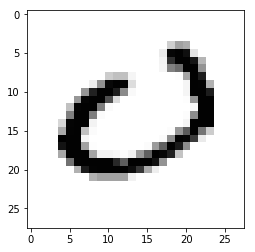

In [16]:

# 내 모델의 정확도를 측정해보고 그림을 그려서 확인해봅시다. 



correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))


r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

plt.imshow(mnist.test.images[r:r + 1].
           reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()